# House Price Prediction

#### Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. The dataset used in this project proves that much more influences price negotiations than the number of bedrooms or a white-picket fence. 

#### Purpose: With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, in this project we will predict the final price of each home.

# Part I. Data pre-processing and Exploratory Data Analysis (EDA)

In this section we import libraries to perform the associated task. i.e. pandas to load data file and dada manipulation, matplotlib & seaborn to plot heat map of distribution data and numpy to handle multi-dimensional arrays.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
import os

# Loading the dataset

In [2]:
train = pd.read_csv('/Users/srishtikarakoti/Downloads/train.csv')
test = pd.read_csv('/Users/srishtikarakoti/Downloads/test.csv')
print(train.head())
print('**'* 50)
print(test.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [3]:
print(train.info())
print('**'* 50)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
n_train = train.shape[0]
n_test = test.shape[0]
y = train['SalePrice'].values
print(train['SalePrice'].value_counts())
#print(y.value_counts())
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)

140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
160000    12
115000    12
139000    11
130000    11
125000    10
143000    10
185000    10
180000    10
144000    10
175000     9
147000     9
100000     9
127000     9
165000     8
176000     8
170000     8
129000     8
230000     8
250000     8
200000     8
141000     8
215000     8
148000     7
173000     7
          ..
64500      1
326000     1
277500     1
259000     1
254900     1
131400     1
181134     1
142953     1
245350     1
121600     1
337500     1
228950     1
274000     1
317000     1
154500     1
52000      1
107400     1
218000     1
104000     1
68500      1
94000      1
466500     1
410000     1
437154     1
219210     1
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64


In [6]:
print(data.head())
print(data.shape)

   1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0       856       854          0   NaN             3     1Fam       TA   
1      1262         0          0   NaN             3     1Fam       TA   
2       920       866          0   NaN             3     1Fam       TA   
3       961       756          0   NaN             3     1Fam       Gd   
4      1145      1053          0   NaN             4     1Fam       TA   

  BsmtExposure  BsmtFinSF1  BsmtFinSF2  ...   SaleType ScreenPorch  Street  \
0           No       706.0         0.0  ...         WD           0    Pave   
1           Gd       978.0         0.0  ...         WD           0    Pave   
2           Mn       486.0         0.0  ...         WD           0    Pave   
3           No       216.0         0.0  ...         WD           0    Pave   
4           Av       655.0         0.0  ...         WD           0    Pave   

   TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YearBuilt YearRemodAdd  \
0         

# Data Visualization

#### Heatmap for train set

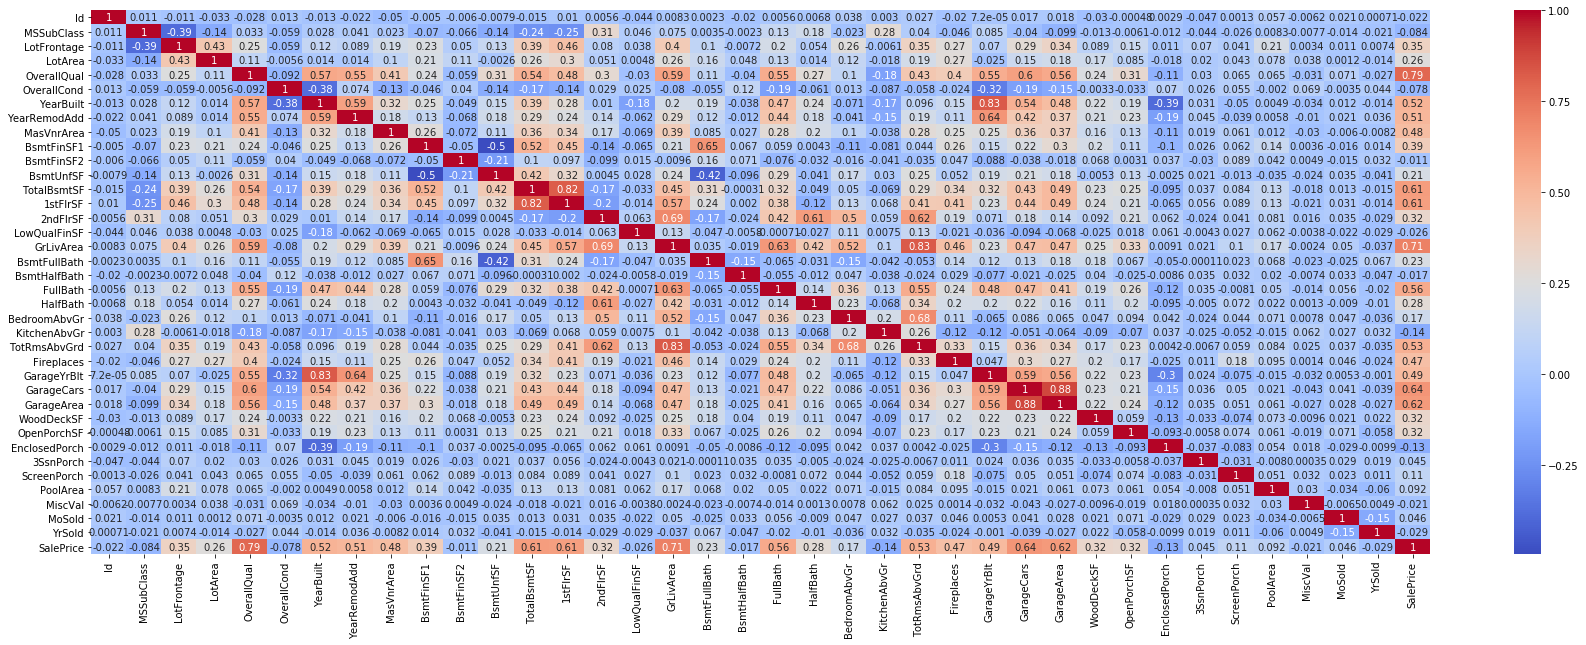

In [7]:
plt.figure(figsize=(30,10))
sns.heatmap(train.corr(),cmap='coolwarm',annot = True)
plt.show()

#### Pair plot

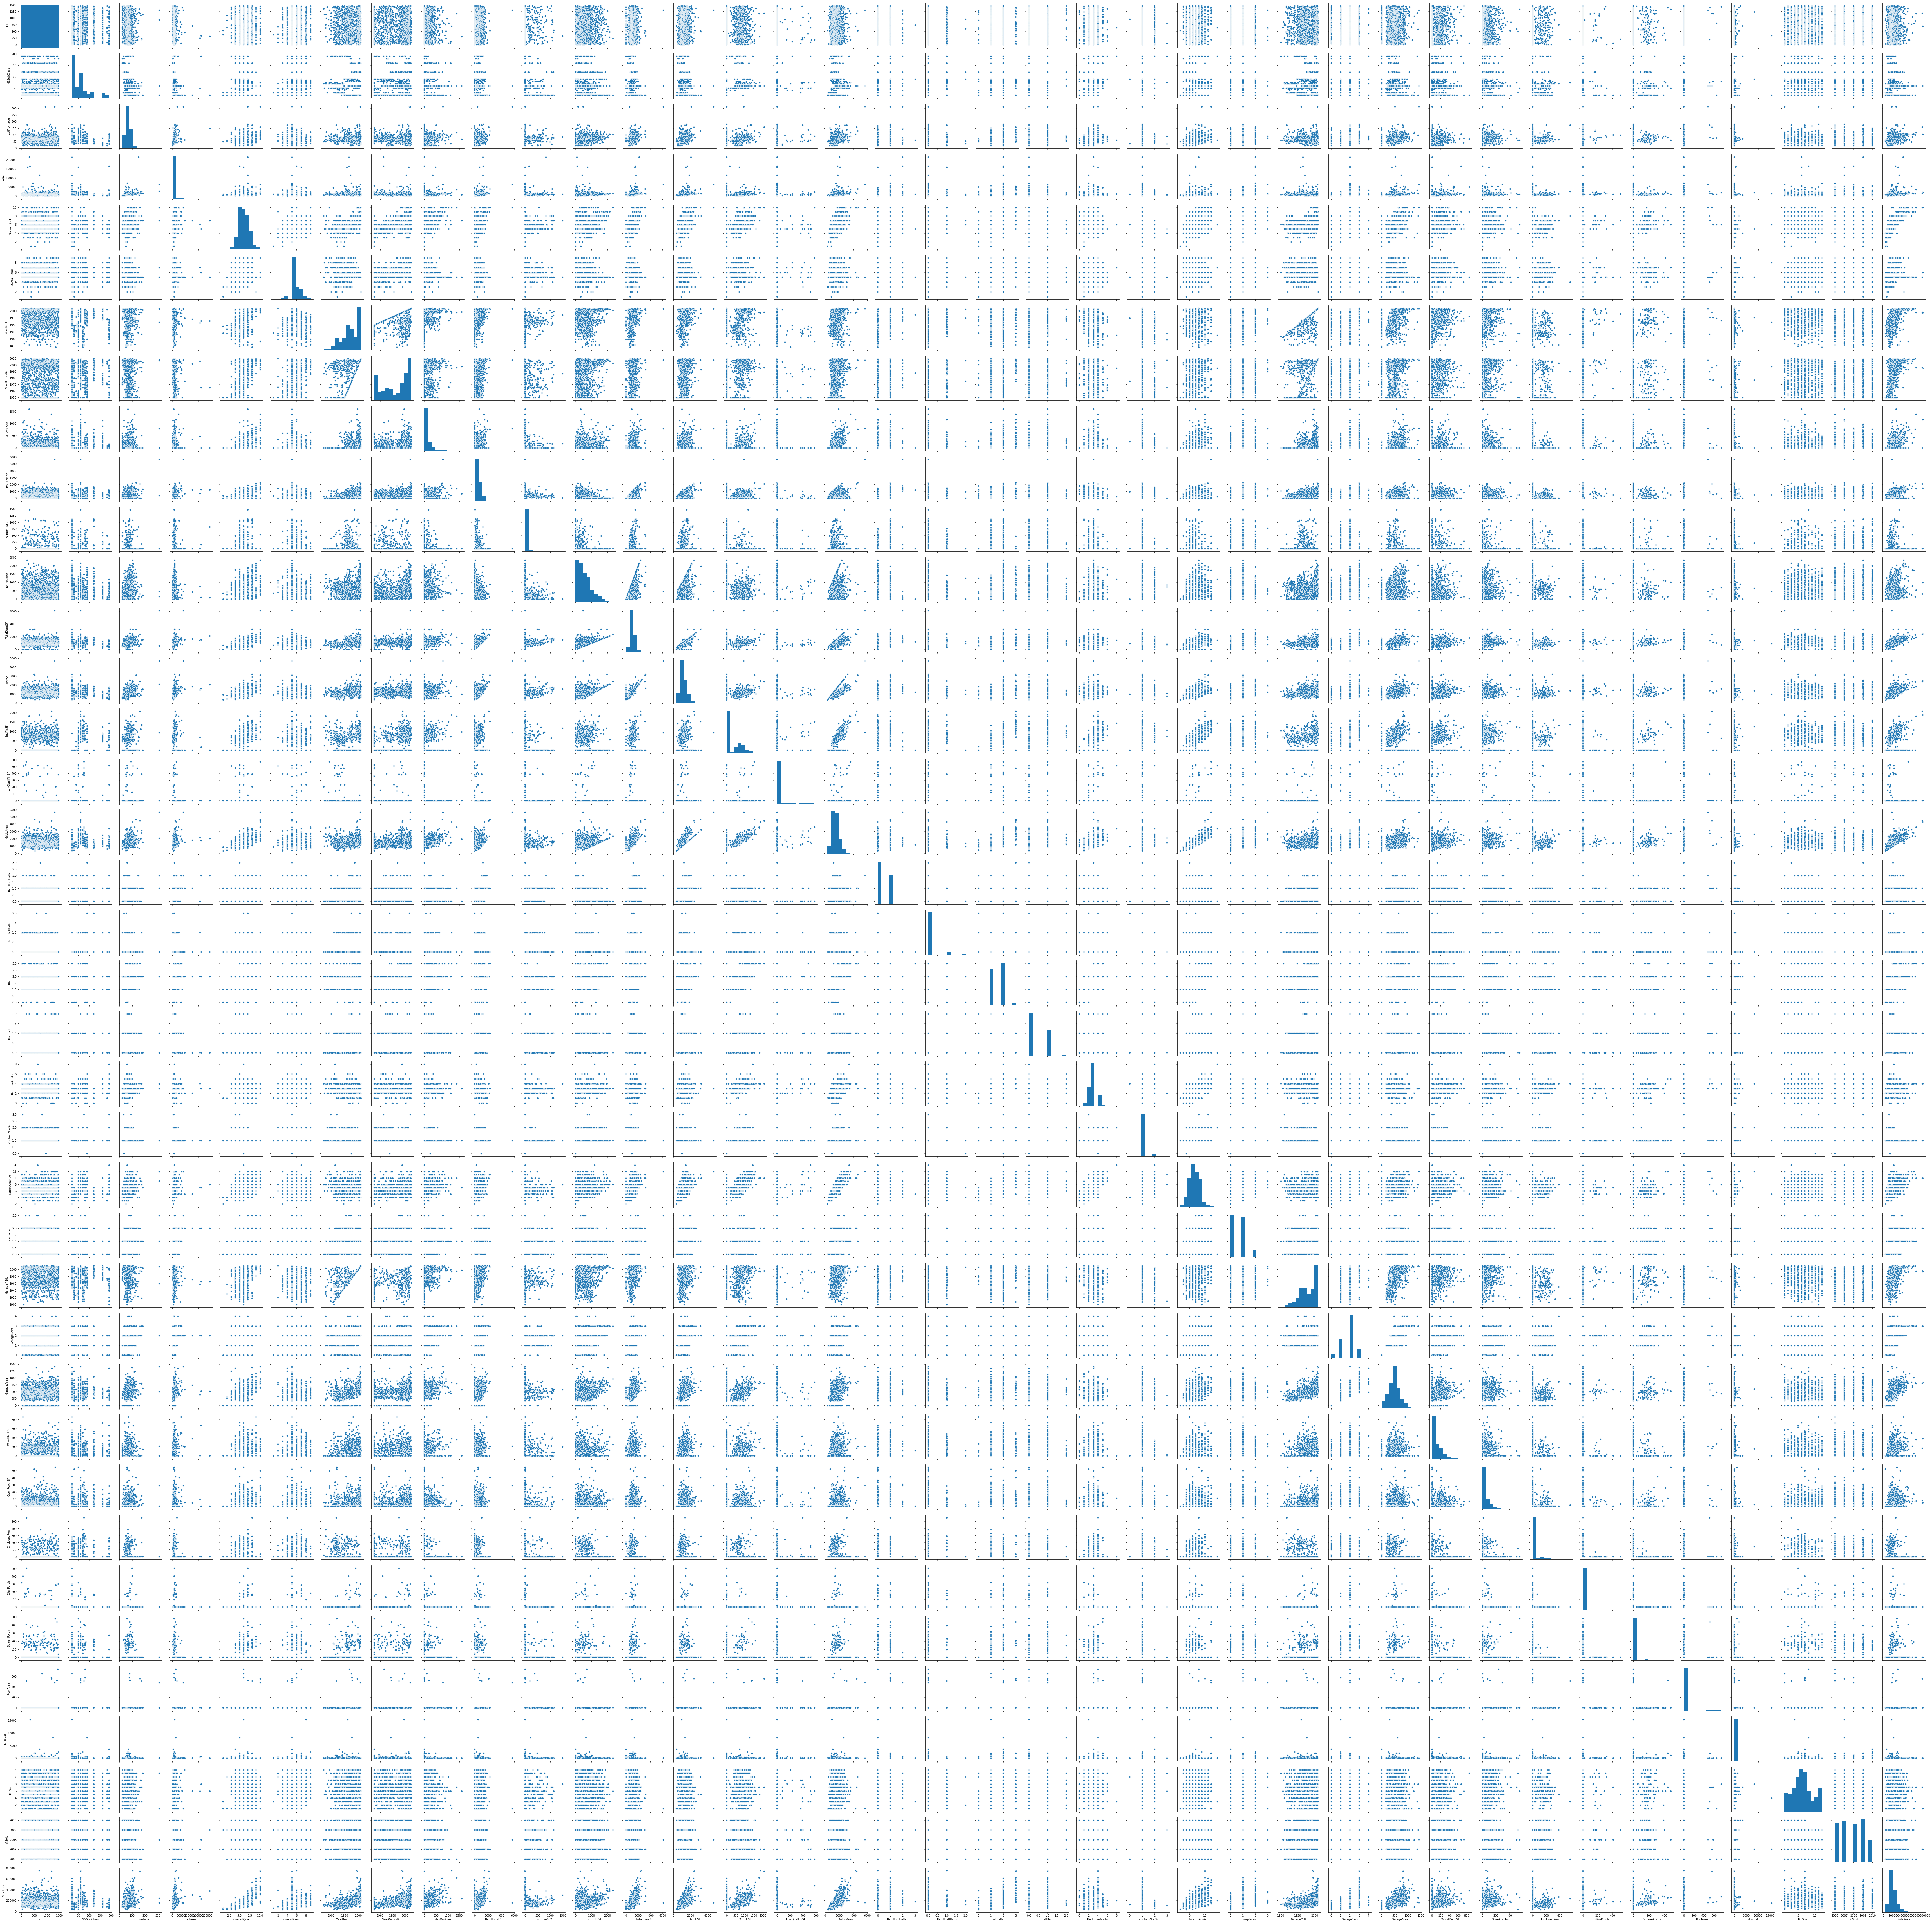

In [8]:
sns.pairplot(train, palette='rainbow')

#### CDF And Pdf for yearbuilt feature

[0.00616438 0.00410959 0.02534247 0.08356164 0.05684932 0.08767123
 0.17876712 0.15273973 0.09520548 0.30958904]
[1872.  1885.8 1899.6 1913.4 1927.2 1941.  1954.8 1968.6 1982.4 1996.2
 2010. ]


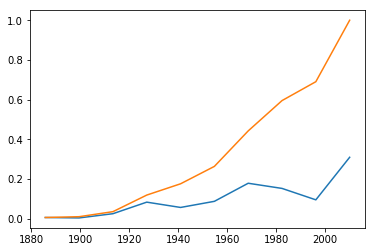

In [9]:
counts, bin_edges = np.histogram(train['YearBuilt'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show();

#### LMPLOT for yearbuilt

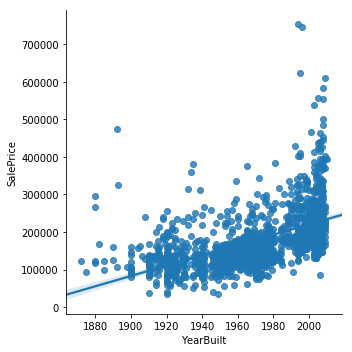

In [10]:
sns.lmplot(x='YearBuilt',y='SalePrice',data=train)

[0.00616438 0.00410959 0.02534247 0.08356164 0.05684932 0.08767123
 0.17876712 0.15273973 0.09520548 0.30958904]
[1872.  1885.8 1899.6 1913.4 1927.2 1941.  1954.8 1968.6 1982.4 1996.2
 2010. ]


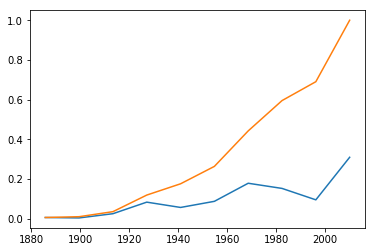

In [11]:
counts, bin_edges = np.histogram(train['YearBuilt'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)




plt.show();

#### Box plot for GarageCars feature

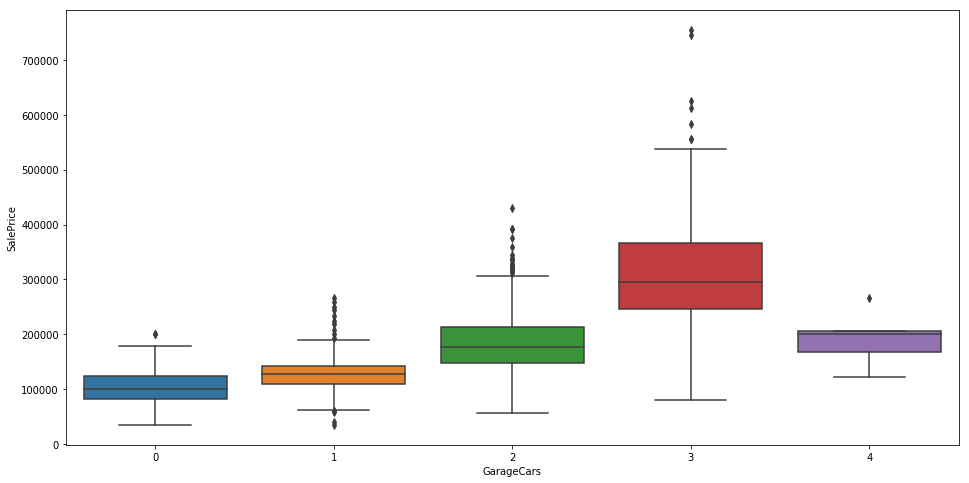

In [12]:
plt.figure(figsize=(16,8))
sns.boxplot(x='GarageCars',y='SalePrice',data=train)
plt.show()

[0.05547945 0.         0.25273973 0.         0.         0.56438356
 0.         0.1239726  0.         0.00342466]
[0.  0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6 4. ]


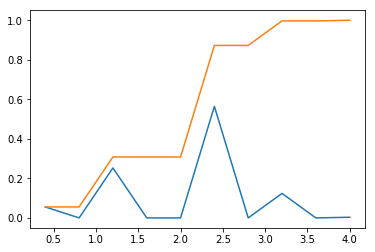

In [13]:
counts, bin_edges = np.histogram(train['GarageCars'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show();

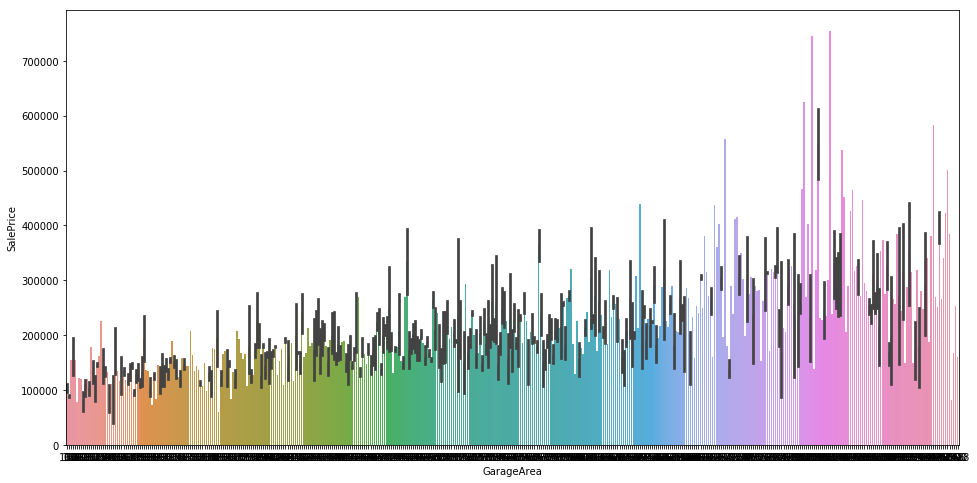

In [14]:
plt.figure(figsize=(16,8))
sns.barplot(x='GarageArea',y = 'SalePrice',data=train, estimator=np.mean)
plt.show()

[0.05547945 0.11438356 0.20068493 0.34246575 0.16438356 0.07260274
 0.0390411  0.00684932 0.00205479 0.00205479]
[   0.   141.8  283.6  425.4  567.2  709.   850.8  992.6 1134.4 1276.2
 1418. ]


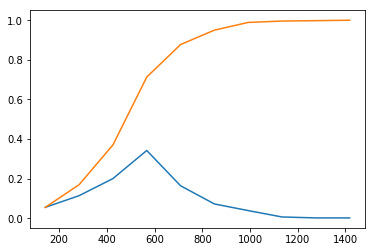

In [15]:
counts, bin_edges = np.histogram(train['GarageArea'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show();

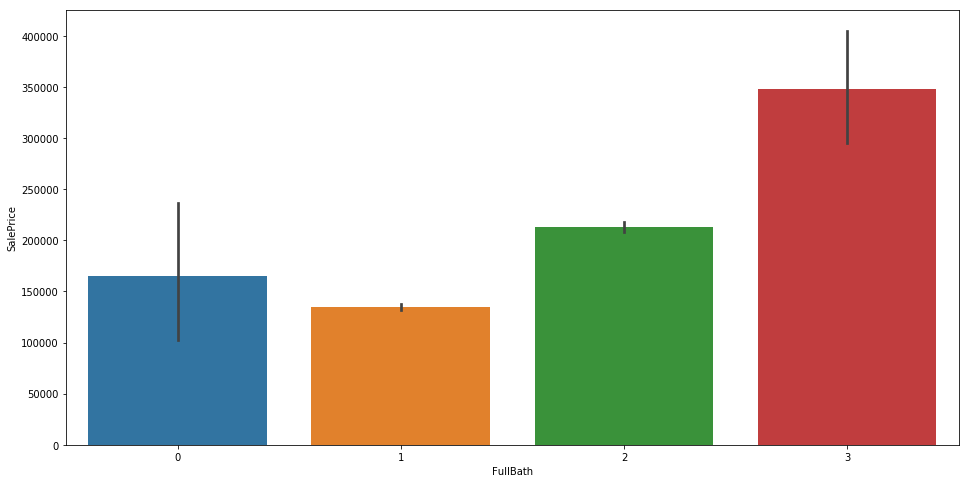

In [16]:
plt.figure(figsize=(16,8))
sns.barplot(x='FullBath',y = 'SalePrice',data=train)
plt.show()

[0.00616438 0.         0.         0.44520548 0.         0.
 0.5260274  0.         0.         0.02260274]
[0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3. ]


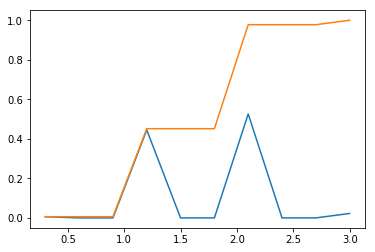

In [17]:
counts, bin_edges = np.histogram(train['FullBath'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.show();

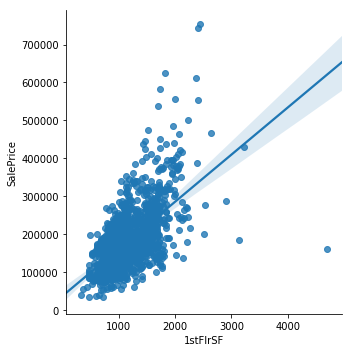

In [18]:
sns.lmplot(x='1stFlrSF',y='SalePrice',data=train)

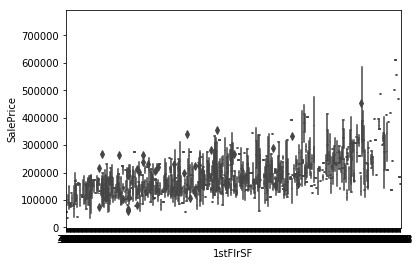

In [19]:
sns.boxplot(x='1stFlrSF',y='SalePrice',data=train)

# Feature Engineering

#### First, we have to convert all columns into numeric or categorical data.

In [20]:
data = data[['LotArea','Street', 'Neighborhood','Condition1', 'Condition2','BldgType','HouseStyle','OverallCond', 'Heating','CentralAir','Electrical','1stFlrSF','2ndFlrSF','BsmtHalfBath','FullBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageCars','GarageArea','PoolArea']]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 21 columns):
LotArea         2919 non-null int64
Street          2919 non-null object
Neighborhood    2919 non-null object
Condition1      2919 non-null object
Condition2      2919 non-null object
BldgType        2919 non-null object
HouseStyle      2919 non-null object
OverallCond     2919 non-null int64
Heating         2919 non-null object
CentralAir      2919 non-null object
Electrical      2918 non-null object
1stFlrSF        2919 non-null int64
2ndFlrSF        2919 non-null int64
BsmtHalfBath    2917 non-null float64
FullBath        2919 non-null int64
BedroomAbvGr    2919 non-null int64
KitchenAbvGr    2919 non-null int64
TotRmsAbvGrd    2919 non-null int64
GarageCars      2918 non-null float64
GarageArea      2918 non-null float64
PoolArea        2919 non-null int64
dtypes: float64(3), int64(9), object(9)
memory usage: 479.0+ KB


#### Now, fill in NULL values

In [22]:
data['BsmtHalfBath'] = data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].mean())
data['GarageCars'] = data['GarageCars'].fillna(data['GarageCars'].mean())
data['GarageArea'] = data['GarageArea'].fillna(data['GarageArea'].mean())
#data['Electrical']=data['Electrical'].fillna(' ')

#### Onehot encoding on categorical data
One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [23]:
# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols = data.columns[categorical_feature_mask].tolist()
print(categorical_cols)
print("number of categorical features ",len(categorical_cols))

# i in range(len(categorical_cols)):
 # data[i]=data[i].fillna(' ')
#data['Electrical'] = data['Electrical'].fillna(' ')

['Street', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'Heating', 'CentralAir', 'Electrical']
number of categorical features  9


In [24]:
data = pd.get_dummies(data, columns=categorical_cols)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 82 columns):
LotArea                 2919 non-null int64
OverallCond             2919 non-null int64
1stFlrSF                2919 non-null int64
2ndFlrSF                2919 non-null int64
BsmtHalfBath            2919 non-null float64
FullBath                2919 non-null int64
BedroomAbvGr            2919 non-null int64
KitchenAbvGr            2919 non-null int64
TotRmsAbvGrd            2919 non-null int64
GarageCars              2919 non-null float64
GarageArea              2919 non-null float64
PoolArea                2919 non-null int64
Street_Grvl             2919 non-null uint8
Street_Pave             2919 non-null uint8
Neighborhood_Blmngtn    2919 non-null uint8
Neighborhood_Blueste    2919 non-null uint8
Neighborhood_BrDale     2919 non-null uint8
Neighborhood_BrkSide    2919 non-null uint8
Neighborhood_ClearCr    2919 non-null uint8
Neighborhood_CollgCr    2919 non-null uint8
Neighbo

In [26]:
data.shape

(2919, 82)

In [27]:
train =data[:n_train]
test = data[n_train:]
print(train.info())
print(test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
LotArea                 1460 non-null int64
OverallCond             1460 non-null int64
1stFlrSF                1460 non-null int64
2ndFlrSF                1460 non-null int64
BsmtHalfBath            1460 non-null float64
FullBath                1460 non-null int64
BedroomAbvGr            1460 non-null int64
KitchenAbvGr            1460 non-null int64
TotRmsAbvGrd            1460 non-null int64
GarageCars              1460 non-null float64
GarageArea              1460 non-null float64
PoolArea                1460 non-null int64
Street_Grvl             1460 non-null uint8
Street_Pave             1460 non-null uint8
Neighborhood_Blmngtn    1460 non-null uint8
Neighborhood_Blueste    1460 non-null uint8
Neighborhood_BrDale     1460 non-null uint8
Neighborhood_BrkSide    1460 non-null uint8
Neighborhood_ClearCr    1460 non-null uint8
Neighborhood_CollgCr    1460 non-null uint8
Neighbo

# Linear Regression

Linear regression is a technique for estimating linear relationships between various features and a continuous target variable. Regression means estimating a continuous real-value output. For example, if you have data that contains selling prices of houses in your city, you can estimate the selling price of your house based on that data and understand the market. Regression analysis is a subfield of Supervised Learning. Some of the questions that regression can answer  if you are dealing with housing data are as follows:

How much more can I sell my house for with an additional bedroom and bathroom?

Do houses located near malls sell for more or less than others?

What is the impact of lot size on housing prices?

Source: https://www.cloudera.com/tutorials/building-a-linear-regression-model-for-predicting-house-prices.html

We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use.

#### Train Test Split -
Let's split the data into a training set and a testing set. We will train the model on the training set and then use the test set to evaluate the model.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.1, random_state=101)

In [29]:
# we are going to scale to data

y_train= y_train.reshape(-1,1)
y_test= y_test.reshape(-1,1)
print(X_train.info())
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1314 entries, 989 to 863
Data columns (total 82 columns):
LotArea                 1314 non-null int64
OverallCond             1314 non-null int64
1stFlrSF                1314 non-null int64
2ndFlrSF                1314 non-null int64
BsmtHalfBath            1314 non-null float64
FullBath                1314 non-null int64
BedroomAbvGr            1314 non-null int64
KitchenAbvGr            1314 non-null int64
TotRmsAbvGrd            1314 non-null int64
GarageCars              1314 non-null float64
GarageArea              1314 non-null float64
PoolArea                1314 non-null int64
Street_Grvl             1314 non-null uint8
Street_Pave             1314 non-null uint8
Neighborhood_Blmngtn    1314 non-null uint8
Neighborhood_Blueste    1314 non-null uint8
Neighborhood_BrDale     1314 non-null uint8
Neighborhood_BrkSide    1314 non-null uint8
Neighborhood_ClearCr    1314 non-null uint8
Neighborhood_CollgCr    1314 non-null uint8
Neighb

### Creating and Training the Model 

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


### Check Performance: Confusion, Recall, Precision matrix function

In [31]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    # This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
     
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()
    

### Model Evaluation 

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [32]:
# print the intercept
print(lm.intercept_)

[0.00314264]


In [33]:
print(lm.coef_)

[[ 4.45051048e-02  9.84824511e-02  4.25260088e-01  4.27865203e-01
   1.78327828e-02  4.15521451e-02 -1.37863705e-01 -1.15439219e-01
   8.56590875e-02  1.63259801e-01 -3.61010294e-02  2.10417661e-03
  -4.02343139e+12 -4.02343139e+12 -6.67011035e+10 -2.30102049e+10
  -6.27030657e+10 -1.12926823e+11 -8.22021498e+10 -1.78620777e+11
  -1.11836064e+11 -1.48320649e+11 -1.35202864e+11 -9.09824384e+10
  -6.67011035e+10 -1.05013606e+11 -2.11155920e+11 -4.59150596e+10
  -1.28919268e+11 -9.63507828e+10 -1.31658163e+11 -1.60046570e+11
  -7.57323036e+10 -1.29840207e+11 -1.15072068e+11 -1.38633690e+11
  -7.40197272e+10 -9.50403145e+10 -5.37783063e+10  2.14622117e+11
   2.79855442e+11  4.14772784e+11  9.38391475e+10  1.44005525e+11
   8.78120842e+10  1.58195640e+11  4.70272287e+10  5.75744032e+10
   7.17805293e+11  1.60261469e+12  2.57622991e+12  7.17805293e+11
   1.01474334e+12  7.17805293e+11  7.17805293e+11  1.01474334e+12
   2.88849433e+11  1.14926148e+11  1.39179507e+11  1.34394965e+11
   2.09324

### Predictions from our Model 

In [35]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)
#plot_confusion_matrix(y_test, predictions)

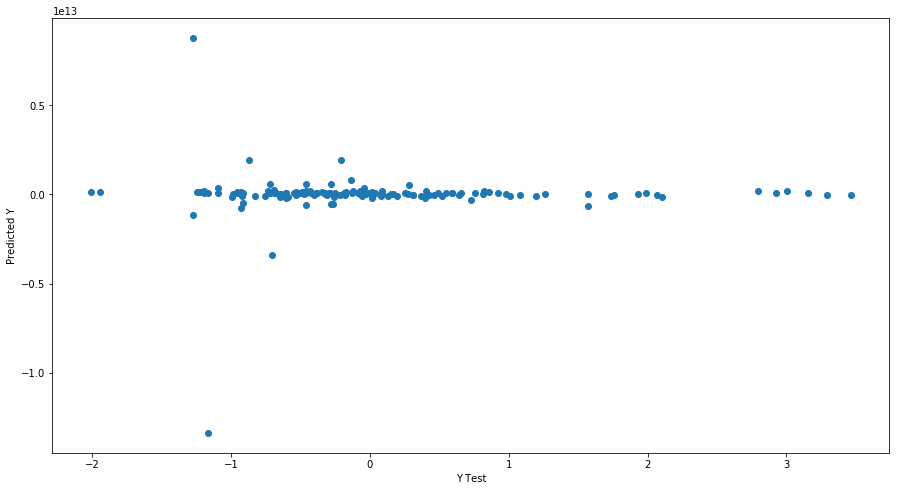

In [36]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

### Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂ 𝑖|

Mean Squared Error (MSE) is the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)

Comparing these metrics:

MAE is the easiest to understand, because it's the average error. MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. All of these are loss functions, because we want to minimize them.

In [37]:
from sklearn import metrics

In [38]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
#print(log_loss(y_test, predictions))

MAE: 337068606006.8781
MSE: 1.93529344563622e+24
RMSE: 1391148247181.5217


# Gradient Boosting Regression
Gradient Boosting trains many models in a gradual, additive and sequential manner. The major difference between AdaBoost and Gradient Boosting Algorithm is how the two algorithms identify the shortcomings of weak learners (eg. decision trees). While the AdaBoost model identifies the shortcomings by using high weight data points, gradient boosting performs the same by using gradients in the loss function (y=ax+b+e , e needs a special mention as it is the error term). The loss function is a measure indicating how good are model’s coefficients are at fitting the underlying data. A logical understanding of loss function would depend on what we are trying to optimise. We are trying to predict the sales prices by using a regression, then the loss function would be based off the error between true and predicted house prices.

Source:https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab

In [39]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

In [42]:
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 0.3120362680874503
MSE: 0.20317770942520502
RMSE: 0.4507523814969867


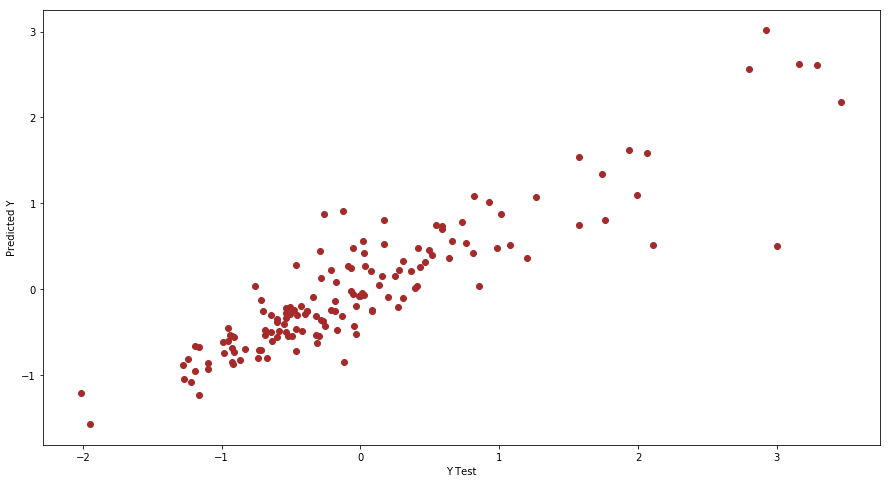

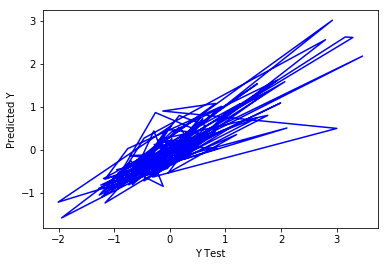

In [43]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()
plt.plot(y_test,clf_pred, c= 'blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Decision Tree Regression
The decision tree is a simple machine learning model for getting started with regression tasks.

Background - A decision tree is a flow-chart-like structure, where each internal (non-leaf) node denotes a test on an attribute, each branch represents the outcome of a test, and each leaf (or terminal) node holds a class label. The topmost node in a tree is the root node. (see here for more details). Not suited for large dataset because of it complexity

In [44]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [45]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 0.37924813566525833
MSE: 0.2909614276598704
RMSE: 0.5394084052551187


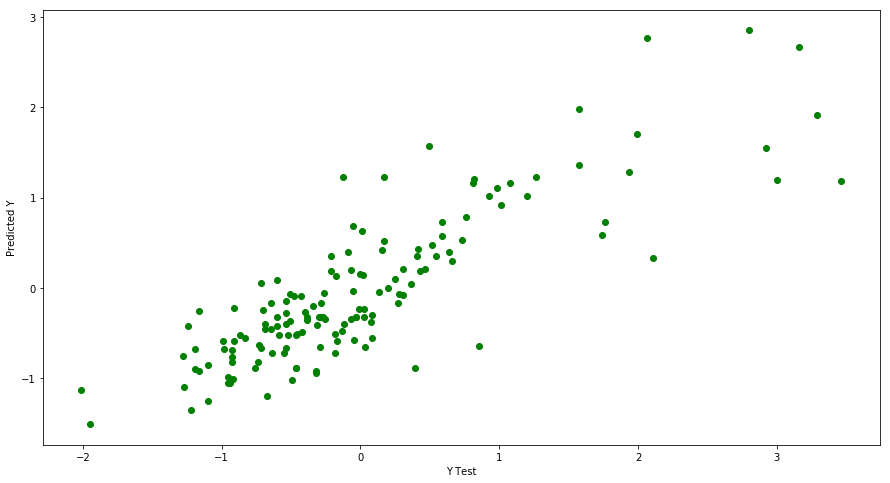

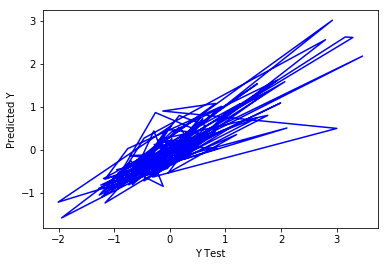

In [47]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()
plt.plot(y_test,clf_pred, c= 'blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Support Vector Machine Regression


Source: https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/

In [48]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [49]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

MAE: 0.2912518552494906
MSE: 0.1719043690230112
RMSE: 0.41461351765591437


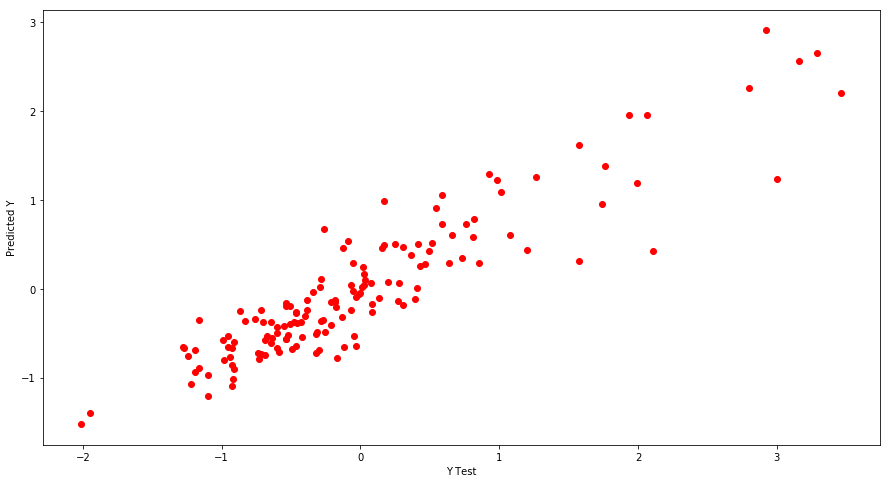

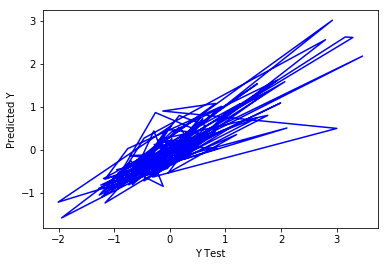

In [51]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()
plt.plot(y_test,clf_pred, c= 'blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Model Comparison
##### We can determine the best working model by loking MSE rates. Hence, the best working model is Support Vector Machine. 

Let's compare error rate:

In [56]:
error_rate=np.array([metrics.mean_squared_error(y_test, predictions),metrics.mean_squared_error(y_test, clf_pred),metrics.mean_squared_error(y_test, dtr_pred),metrics.mean_squared_error(y_test, svr_pred),metrics.mean_squared_error(y_test, rfr_pred)])


print(min(metrics.mean_squared_error(y_test, predictions),min(metrics.mean_squared_error(y_test, clf_pred),min(metrics.mean_squared_error(y_test, svr_pred),metrics.mean_squared_error(y_test, dtr_pred)))))

0.1719043690230112


[1.93529345e+24 2.03177709e-01 2.90961428e-01 1.71904369e-01
 2.20636502e-01]


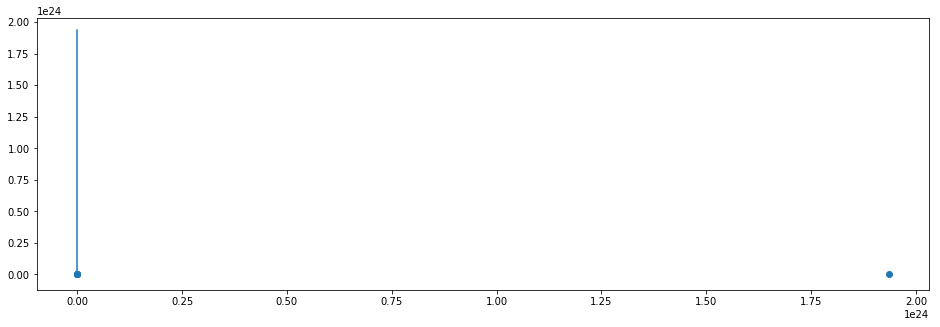

In [57]:
plt.figure(figsize=(16,5))
print(error_rate)
plt.plot(error_rate)
plt.scatter(error_rate,range(1,6))
seed = 7
# prepare models
models = ['SVM','LR','BGT','DT']

Now we will use test data .

In [58]:
a = pd.read_csv('/Users/srishtikarakoti/Downloads/test.csv')

In [59]:
test_id = a['Id']
print(test_id.shape)
#making dataframe 
a = pd.DataFrame(test_id, columns=['Id'])

(1459,)


In [60]:
test = sc_X.fit_transform(test)

In [61]:
test.shape

(1459, 82)

# Prediction with SVM Model

In [62]:
test_prediction_svr=svr.predict(test)
test_prediction_svr= test_prediction_svr.reshape(-1,1)

test_prediction_svr

test_prediction_svr =sc_y.inverse_transform(test_prediction_svr)
test_prediction_svr

array([[131952.54467848],
       [159895.57114585],
       [195871.38045739],
       ...,
       [177114.8192406 ],
       [119033.53364694],
       [235220.49806631]])

In [63]:
test_pred_svr = pd.DataFrame(test_prediction_svr, columns=['SalePrice'])
#test_pred_svr

test_pred_svr.head()

SalePrice
0  131952.544678
1  159895.571146
2  195871.380457
3  193625.194509
4  194475.010263

In [64]:
result = pd.concat([a,test_pred_svr], axis=1)

result.head()

Id      SalePrice
0  1461  131952.544678
1  1462  159895.571146
2  1463  195871.380457
3  1464  193625.194509
4  1465  194475.010263

### We have successfully checked data quality, inputted missing data, selected suitable features, choose at least 3 ML algorithms to build prediction models, tried to improve the model, and finally used the best model to predict house prices.